### Dependencies

In [1]:
%matplotlib inline
import numpy as np # Scientific computing 
import matplotlib.pyplot as plt # Plotting 
from astropy.stats import LombScargle # Basic Astronomy functions
import pandas as pd # Dataframe to store csv file content
import upsilon # Machine Learnign classification of light curve
import seaborn # Additional plotting
seaborn.set() # Set aesthetic parameters in one step.

-------------------------------
* WARNING: No pyFFTW detected *
-------------------------------


### Process Data

In [2]:
# Data from AAVSO
star = "RXLib"

# Load the data from csv file
light_curve = pd.read_csv("RXLib.mag", sep="\s+", names=["JD", "Magnitude", "Uncertainty"])

# Creating numpy array from pandas dataframe
mag = np.array(light_curve.fillna(0).Magnitude.tolist())
time = np.array(light_curve.fillna(0).JD.tolist())
err = np.array(light_curve.fillna(0).Uncertainty.tolist()) #fillna(0) replaces NaN with 0

light_curve

JD  Magnitude  Uncertainty
0     3860.39117   11.83673      0.11885
1     3860.39807   11.85210      0.11753
2     3860.40583   11.84147      0.11322
3     3860.40628   11.83938      0.11253
4     3860.41424   11.85790      0.10807
5     3860.42049   11.84558      0.10537
6     3860.42093   11.85181      0.10513
7     3860.42600   11.83902      0.10556
8     3860.43132   11.84944      0.10588
9     3860.43689   11.84659      0.10520
10    3860.44227   11.85262      0.10537
11    3860.44999   11.85873      0.10466
12    3860.45046   11.85098      0.10481
13    3860.45756   11.84370      0.10490
14    3860.45799   11.84101      0.10479
15    3860.46410   11.83892      0.10543
16    3860.46454   11.84391      0.10509
17    3860.47064   11.85148      0.10553
18    3860.47110   11.85120      0.10575
19    3860.47726   11.84204      0.10608
20    3860.47770   11.85372      0.10618
21    3860.48267   11.84941      0.10549
22    3860.48311   11.84271      0.10619
23    3860.48784   11.84801      0.10571
24    3860.48828   11.84902      0.10617
25    3860.49634   11.84394      0.10584
26    3860.49678   11.83973      0.10613
27    3860.50293   11.84744      0.10684
28    3860.50337   11.84303      0.10695
29    3860.50966   11.84249      0.10768
...          ...        ...          ...
8832  4614.47194   12.25855      0.13109
8833  4614.47735   12.25874      0.13111
8834  4614.47779   12.25086      0.13123
8835  4614.48317   12.24591      0.13387
8836  4614.48361   12.25496      0.13378
8837  4614.48928   12.27203      0.13293
8838  4614.48973   12.24666      0.13362
8839  4614.49543   12.25663      0.13350
8840  4614.49587   12.24725      0.13394
8841  4614.50157   12.24869      0.13484
8842  4614.50200   12.26649      0.13462
8843  4614.50770   12.24081      0.13700
8844  4614.50814   12.25640      0.13560
8845  4614.51434   12.24408      0.13693
8846  4614.51479   12.26717      0.13605
8847  4614.51943   12.27443      0.13797
8848  4614.51987   12.25851      0.13928
8849  4614.52457   12.25848      0.14383
8850  4614.52501   12.27519      0.14247
8851  4614.52968   12.26107      0.14140
8852  4614.53012   12.26287      0.14208
8853  4614.53478   12.25331      0.14464
8854  4614.53522   12.26746      0.14203
8855  4614.54064   12.22724      0.14473
8856  4614.54108   12.25724      0.14468
8857  4614.54574   12.24218      0.14514
8858  4614.54617   12.27673      0.14628
8859  4614.55084   12.25968      0.14682
8860  4614.55128   12.27034      0.14736
8861  4614.55865   12.24084      0.14993

[8862 rows x 3 columns]

### Raw Data Plot

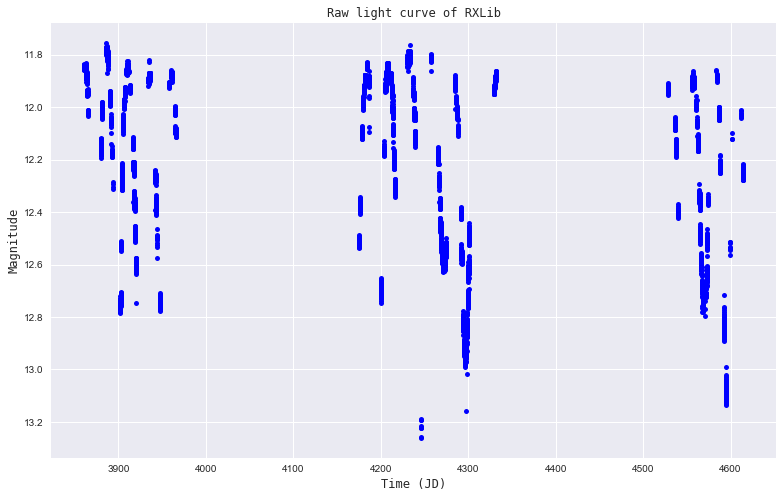

In [3]:
# Plot the raw data.
plt.figure(figsize=(13,8))
plt.plot(time, mag, marker='o', ls='None', ms=5, c='b')
plt.gca().invert_yaxis()
plt.xlabel("Time (JD)", size='medium', family = 'monospace')
plt.ylabel("Magnitude", size='medium', family = 'monospace')
plt.title("Raw light curve of " +star, size='medium', family = 'monospace')
plt.show()

### Lomb-Scargle Periodogram

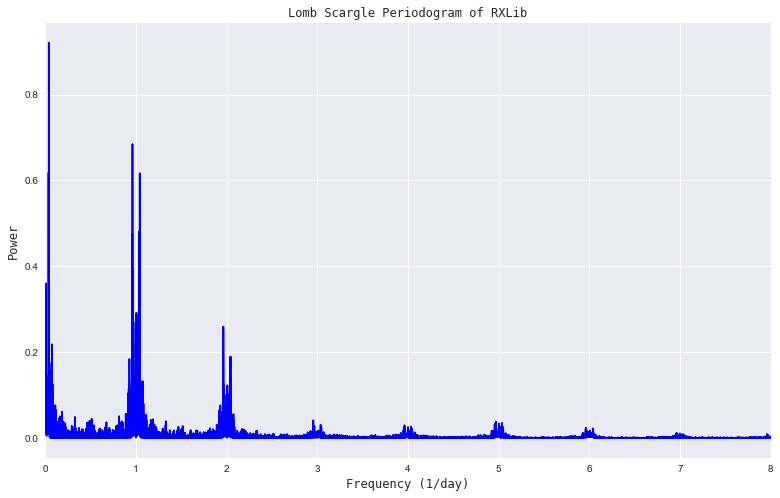

The best frequency is 0.0401767522514


In [4]:
# If undertainty column in data is 0 then manually give uncertainity value to all points.
#err = 0.01

# nterms (1 by default) controls how many Fourier terms are used in the model.
frequency, power = LombScargle(time, mag, err, nterms = 1).autopower()
plt.figure(figsize=(13,8))
plt.plot(frequency, power, c='b')
plt.xlabel("Frequency (1/day)", size='medium', family = 'monospace')
plt.ylabel("Power", size='medium', family = 'monospace')
plt.title("Lomb Scargle Periodogram of " +star, size='medium', family = 'monospace')
plt.xlim([min(frequency), 8])
plt.savefig(star+'_power.png')
plt.show()

best_frequency = frequency[np.argmax(power)]
print("The best frequency is", best_frequency)

### Phase Plot with Best-Fit Sinusoid 

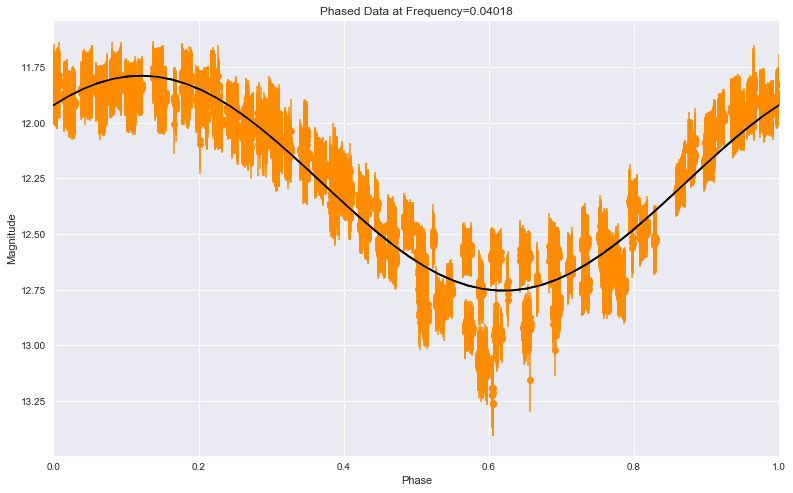

In [5]:
phase_fit = np.linspace(0, 1)
y_fit = LombScargle(time, mag, err, nterms=1).model(phase_fit/best_frequency, frequency=best_frequency)
phase = (time*best_frequency)%1

fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(phase_fit, y_fit, color='black', zorder=10)
ax.errorbar(phase, mag, err, fmt='o', mew=0, capsize=0, elinewidth=1.5, c='darkorange')
ax.plot(phase_fit, y_fit, color='black')
ax.invert_yaxis()
plt.xlim([0,1])
ax.set(xlabel='Phase',
       ylabel='Magnitude',
       title='Phased Data at Frequency={0:.5f}'.format(best_frequency))
plt.show()

### Classification

$\textbf{UPSILoN: AUtomated Classification for Periodic Variable Stars using MachIne LearNing.}$ This software package classifies a light curve into a class of a periodic variable star in an automatic manner. It can be applied to light curves from optical surveys regardless of survey-specific characteristics (e.g., photometric accuracy, sampling rate, duration, etc.) as long as the light curves satisfy a few broad conditions:

– it contains at least a few tens of data points that sample the characteristic variability well;

– the observation duration is more than a few weeks;

– the light curve is obtained in an optical band.

If multiple optical bands are available, UPSILoN can classify them separately. It does not use – or rely on – color information. UPSILoN is currently trained to classify into six types of periodic variables: δ Scuti, RR Lyrae, Cepheid, Type II Cepheid, eclipsing binary, long-period variable, and their subclasses. UPSILoN can also separate non-variables from these periodic variables, which is important because the majority of light curves from most time-series surveys are non-variables.

#### UPSILoN CLassification
$\textit{Variable Star Type}$: Long-Period Variables (LPV), Cepheid, Type II Cepheid, RR Lyrae, δ Scuti, and eclipsing binary.

$\textit{Subclass}$: Ex. Mira

$\textit{Phase of Evolution}$: Ex. asymptotic giant branch (AGB)

$\textit{Spectral Type}$: Ex. C

In [6]:
# time, mag, err are numpy arrays.
def classify_lightcurve(time, mag, err):
    # Refine data. This removes fluctuated data points in magnitudes.
    #date, mag, err = upsilon.utils.sigma_clipping(date, mag, err, threshold=3, iteration=1)
    
    # Load a classification model.
    rf_model = upsilon.load_rf_model()

    # Extract features
    e_features = upsilon.ExtractFeatures(time, mag)
    e_features.run()
    features = e_features.get_features()

    # Classify the light curve
    label, probability, flag = upsilon.predict(rf_model, features)
    print('Class: ',label,'\n', 
          'Probability: ',probability ,'\n', 
          'Flag: ',flag,'\n', # (0: successful classification) and (1: Suspicious classification)
          'Best Period: ',features['period'])
        
classify_lightcurve(time, mag, err)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\A\Anaconda3\lib\site-packages\sklearn\base.py:312: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.18.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\A\Anaconda3\lib\site-packages\upsilon\extract_features\extract_features.py:195: RuntimeWarning: divide by zero encountered in log10
  np.log10(pLS.getSignificance(fx, fy, nout, oversampling)[jmax])


Class:  T2CEPH 
 Probability:  0.829669603524 
 Flag:  0 
 Best Period:  24.8626641758
